# CodSoft

## Task 3: CREDIT CARD FRAUD DETECTION
### Objective:-
Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or undersampling for improving results.     
**Dataset:-** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Importing Libraries

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier 
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Loading the Dataset

In [20]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('/Users/asaifali/Desktop/Internships/Codsoft/creditcard.csv',encoding='ISO-8859-1')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


## Feature Engineering

In [23]:
X=data.drop('Class',axis=1)
y=data['Class']

In [24]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Importance

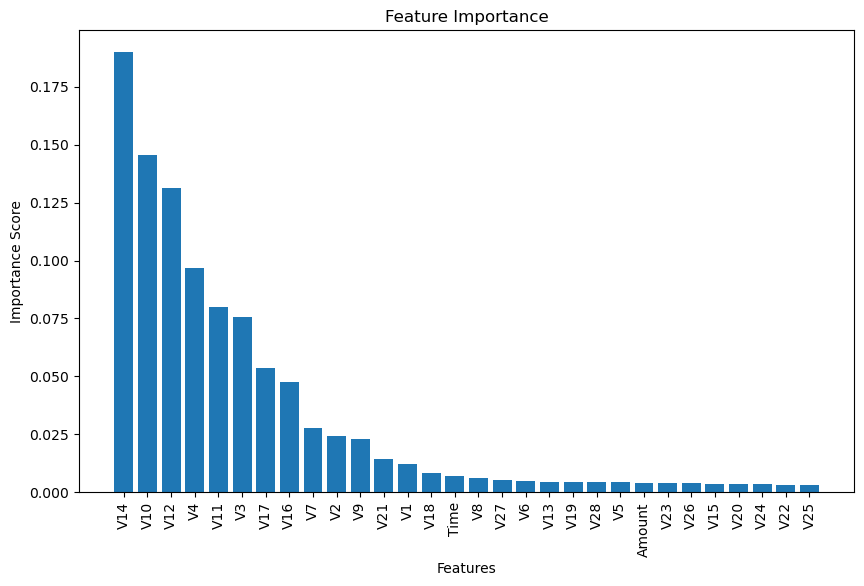

In [51]:
# Load the features   
feature_names = data.columns

# Train a RandomForestRegressor 
RandomForestmodel = RandomForestClassifier()
RandomForestmodel.fit(X, y)

# Get feature importances from the model
importances = RandomForestmodel.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


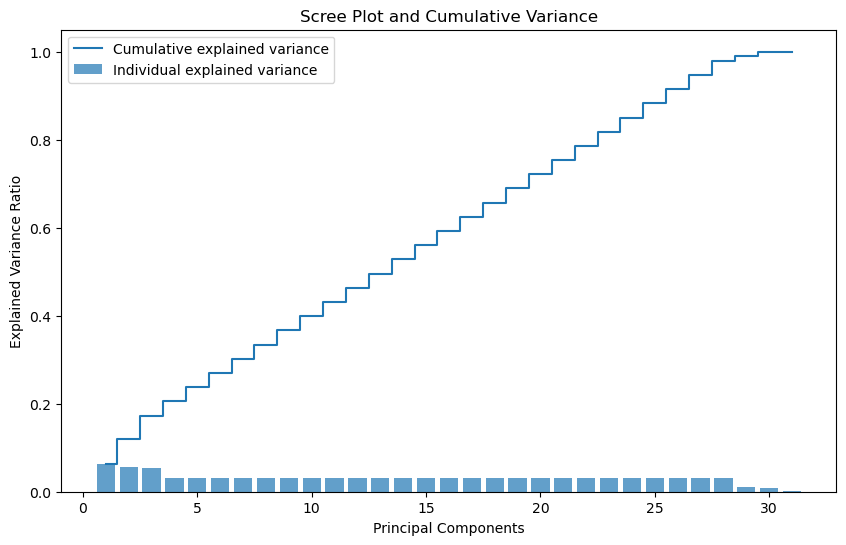

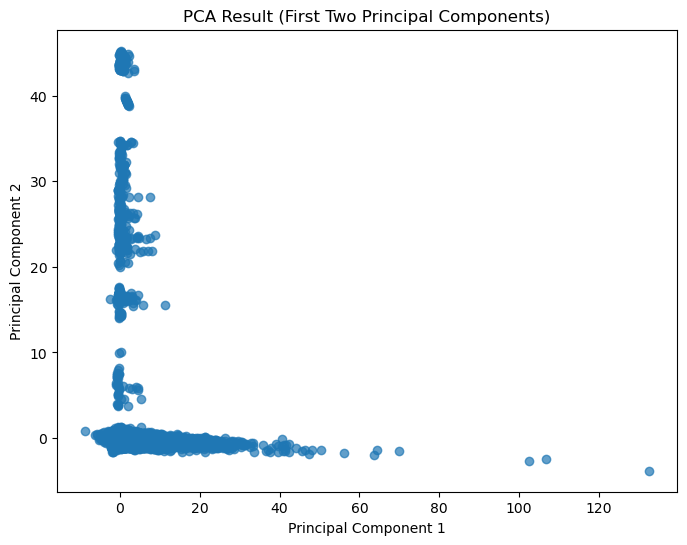

In [52]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create PCA model
pca = PCA()

# Fit the model on the standardized data
pca.fit(scaled_data)

# Transform the data into the new feature space
pca_result = pca.transform(scaled_data)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Variance')
plt.legend()
plt.show()

# Identify the optimal number of components
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Choose components capturing at least 95% of variance

# Create PCA model with the optimal number of components
pca_optimal = PCA(n_components=num_components)
pca_result_optimal = pca_optimal.fit_transform(scaled_data)

# Visualize the transformed data (for demonstration, you may adjust based on your specific use case)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], alpha=0.7)
plt.title('PCA Result (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Comparision Of Models

### Random Forest Classifier

In [31]:
# Initialize the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9998944832316269
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56738    12]
 [    0 56976]]


### Decision Tree Classifier

In [33]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9984875929866521
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56631   119]
 [   53 56923]]


### Support Vector Machine Classifier

In [35]:
# Instantiate the SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels such as 'poly', 'rbf', etc.

# Fit the classifier on the training data
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9814642210224575
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Confusion Matrix:
 [[56371   379]
 [ 1729 55247]]


### Gaussian Naive Bayes

In [37]:
# Initialize the Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9240894782195804
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     56750
           1       0.97      0.87      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726

Confusion Matrix:
 [[55433  1317]
 [ 7316 49660]]


### K Nearest Neighbors Classifier

In [39]:
# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9991031074688286
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56648   102]
 [    0 56976]]


### Gradient Boosting Classifier

In [41]:
# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
# Make predictions on the test data
y_pred = gbm_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9868719554015792
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Confusion Matrix:
 [[56377   373]
 [ 1120 55856]]


### AdaBoost Classifier

In [43]:
# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [44]:
# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9871445403865431
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Confusion Matrix:
 [[56286   464]
 [  998 55978]]


### CatBoost Classifier

In [45]:
Catboost_model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           loss_function='Logloss', 
                           verbose=True) # Adjust parameters as needed

In [46]:
# Train the model
Catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True) # Adjust parameters as needed

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4672283	test: 0.4674510	best: 0.4674510 (0)	total: 91.9ms	remaining: 1m 31s
1:	learn: 0.3314196	test: 0.3316487	best: 0.3316487 (1)	total: 127ms	remaining: 1m 3s
2:	learn: 0.2489988	test: 0.2493118	best: 0.2493118 (2)	total: 164ms	remaining: 54.5s
3:	learn: 0.1948880	test: 0.1952041	best: 0.1952041 (3)	total: 239ms	remaining: 59.5s
4:	learn: 0.1616902	test: 0.1620911	best: 0.1620911 (4)	total: 269ms	remaining: 53.5s
5:	learn: 0.1380116	test: 0.1383931	best: 0.1383931 (5)	total: 305ms	remaining: 50.6s
6:	learn: 0.1211773	test: 0.1216647	best: 0.1216647 (6)	total: 343ms	remaining: 48.7s
7:	learn: 0.1100661	test: 0.1105696	best: 0.1105696 (7)	total: 378ms	remaining: 46.9s
8:	learn: 0.1023839	test: 0.1028767	best: 0.1028767 (8)	total: 445ms	remaining: 49s
9:	learn: 0.0947843	test: 0.0952806	best: 0.0952806 (9)	total: 481ms	remaining: 47.7s
10:	learn: 0.0874508	test: 0.0880147	best: 0.0880147 (10)	total: 554ms	remaining: 49.8s
11:	learn: 0.0821567	test: 0.0826890	best: 0.0826890

In [47]:
# Make predictions on the test data
y_pred = Catboost_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.999621898246663
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56707    43]
 [    0 56976]]


### XGBoost Classifier

In [48]:
# Create an instance of the XGBoost model
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [50]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9998681040395336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56735    15]
 [    0 56976]]


## Conclusion:  Based on Accuracy Score, we can infer that Random Forest Classifier is the best model and Gaussian Naive Bayes is the worst model.